In [1]:
import IGIMF4
import numpy as np
import pandas as pd
plots = IGIMF4.Plots()

In [2]:
metal_mass_fraction = 0.1 * 0.0142
resolution = 20

In [3]:
# Grids
M_igal_v = np.logspace(6, 11,num=resolution)

#mstar_v = np.logspace(-2,np.log10(3.6e3),num=50)
mstar_v = np.logspace(np.log10(0.07),np.log10(150), num=resolution)
print(f'{mstar_v=}')
print(f'{np.where(mstar_v<0.08)=}')
print(f'{np.where(mstar_v>150)=}\n')

Mecl_v = np.logspace(np.log10(5),10,num=resolution)
print(f'{Mecl_v=}')
print(f'{np.where(Mecl_v<5)=}')
print(f'{np.where(Mecl_v>5e9)=}\n')

Z_massfrac_v = np.logspace(-9,-1,num=resolution)
print(f'{Z_massfrac_v=}')
print(f'{np.where(Z_massfrac_v<1e-5)=}')
print(f'{np.where(Z_massfrac_v>0.0142)=}\n')

metallicity_v = np.log10(Z_massfrac_v/0.0142)

mstar_v=array([7.00000000e-02, 1.04812595e-01, 1.56938286e-01, 2.34987271e-01,
       3.51851794e-01, 5.26835708e-01, 7.88843108e-01, 1.18115276e+00,
       1.76856693e+00, 2.64811556e+00, 3.96508376e+00, 5.93701025e+00,
       8.88962070e+00, 1.33106316e+01, 1.99303119e+01, 2.98421101e+01,
       4.46832714e+01, 6.69052802e+01, 1.00178800e+02, 1.50000000e+02])
np.where(mstar_v<0.08)=(array([0]),)
np.where(mstar_v>150)=(array([19]),)

Mecl_v=array([5.00000000e+00, 1.54346896e+01, 4.76459284e+01, 1.47080023e+02,
       4.54026898e+02, 1.40155284e+03, 4.32650661e+03, 1.33556573e+04,
       4.12280848e+04, 1.27268538e+05, 3.92870075e+05, 1.21276553e+06,
       3.74373189e+06, 1.15566679e+07, 3.56747162e+07, 1.10125634e+08,
       3.39950995e+08, 1.04940761e+09, 3.23945615e+09, 1.00000000e+10])
np.where(Mecl_v<5)=(array([], dtype=int64),)
np.where(Mecl_v>5e9)=(array([19]),)

Z_massfrac_v=array([1.00000000e-09, 2.63665090e-09, 6.95192796e-09, 1.83298071e-08,
       4.83293024e-08, 1.2742749

In [4]:
SFR_v = []
downsizing_time_v = []
igimf4_v = []
for M in M_igal_v:
    downsizing_obj = IGIMF4.Downsizing(M)
    SFR_v.append(downsizing_obj.SFR)
    downsizing_time_v.append(downsizing_obj.downsizing_time)
    igimf4_obj = IGIMF4.IGIMF(metal_mass_fraction, downsizing_obj.SFR)
    igIMF4 = igimf4_obj.gwIMF()
    igimf4_v.append(igIMF4)

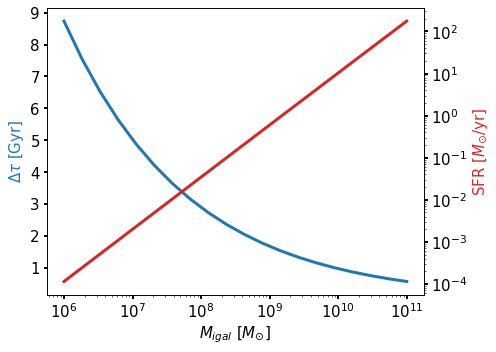

In [5]:
plots.Migal_plot(M_igal_v, SFR_v, downsizing_time_v)

__IGIMF for a given metal mass fraction__

In [6]:
gwIMF_bySFR_eval = []
for i,S in enumerate(SFR_v):
    gwIMF_bySFR_eval.append([igimf4_v[i](m) for m in mstar_v])

In [7]:
gwIMF_bySFR_eval[0]

[0.0,
 3344.470788247639,
 2738.8661721669996,
 2242.92223912198,
 1836.7820311452647,
 1427.5647925040855,
 780.771228262833,
 373.4524094851133,
 147.57397344813023,
 40.89446334707828,
 9.211138155874185,
 1.9334113384702112,
 0.342014798996245,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [8]:
([[5,7.6],[10,38.8],[20,171.5]])


[[5, 7.6], [10, 38.8], [20, 171.5]]

In [16]:
def gwIMF_plots(star_v, gwIMF_bySFR_eval, SFR_v, metal_mass_fraction):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    Msun = r'$M_{\odot}$'
    cm = plt.cm.get_cmap(name='magma')
    num_colors = len(gwIMF_bySFR_eval)
    Z = [[0,0],[0,0]]
    #levels = np.linspace(np.log10(SFR_v[0]), np.log10(SFR_v[-1]), num_colors, endpoint=True)
    levels = np.linspace(np.log10(SFR_v[0]), np.log10(SFR_v[-1]), 100, endpoint=True)
    CS3 = plt.contourf(Z, levels, cmap=cm)
    plt.clf()
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    SFR_colormap = (SFR_v)#np.log10(np.logspace(np.log10(SFR[0]), np.log10(SFR[-1]), 10, endpoint=True))
    currentColors = [cm(1.*i/num_colors) for i in range(num_colors)]
    currentColor = iter(currentColors)
    #dummy_cax = ax.scatter(star_v,gwIMF_bySFR_eval[19], linewidth=3, vmin=SFR_colormap[0], vmax=SFR_colormap[-1], c=np.log10(SFR), cmap=cm, alpha=1)
    for i,gwIMF in enumerate(gwIMF_bySFR_eval):
        ax.loglog(star_v,gwIMF, linewidth=3, c=next(currentColor))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad="2%")
    ax.set_title(f'[Z] = {np.log10(metal_mass_fraction/0.0142):.2f}', fontsize=15)
    ax.set_ylabel(r'$\xi_{gwIMF}$', fontsize=15)
    ax.set_xlabel(r'stellar mass [%s]' %(Msun), fontsize=15)
    #ax.set_ylim(1e-1,1e5)
    ax.tick_params(width=2)
    cbar = fig.colorbar(CS3, cmap=cm, cax=cax, format="%.2f", ticks=ticker.MultipleLocator(1)).set_label(label=r'$\log_{10}({\rm SFR})$',size=15)
    fig.tight_layout()
    plt.savefig(f'gwIMF_plots.pdf', bbox_inches='tight')
    #plt.show(block=False)
    return None

<Figure size 432x288 with 0 Axes>

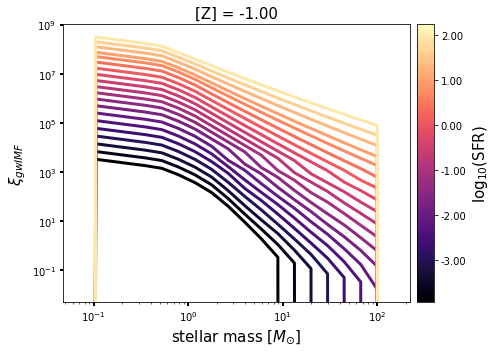

In [17]:
gwIMF_plots(mstar_v, gwIMF_bySFR_eval, SFR_v, metal_mass_fraction)